<a href="https://colab.research.google.com/github/agustinelson/natural-language-processing-ML-Project/blob/main/NLP_Sentimient_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE SENTIMIENTOS

El objetivo de este proyecto es proponer y evaluar un modelo de análisis de sentimientos basado en redes neuronales recurrentes (RNN) que implementa la arquitectura ResNET utilizando la biblioteca TensorFlow. La combinación de estas técnicas tiene como objetivo mejorar el rendimiento del modelo en la clasificación de sentimientos en comparación con enfoques tradicionales.

**Nota**

Descargar el dataset de aquí:
https://github.com/agustinelson/natural-language-processing-ML-Project/tree/main/data


**Recopilación de datos**

Se recopilará un conjunto de datos etiquetados que contenga ejemplos de texto con sus respectivos sentimientos asociados.

https://github.com/agustinelson/natural-language-processing-ML-Project/blob/main/data/train.txt

In [3]:
import numpy as np
import pandas as pd

In [4]:
train_data = pd.read_csv("data/train.txt",
                         sep=";",
                         names=["comment", "label"])
train_data = train_data.dropna()
train_data 

,comment,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [5]:
test_data = pd.read_csv("data/test.txt",
                         sep=";",
                         names=["comment", "label"])
test_data = test_data.dropna()
test_data

,comment,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [6]:
valid_data = pd.read_csv("data/val.txt",
                         sep=";",
                         names=["comment", "label"])
valid_data = valid_data.dropna()
valid_data

,comment,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


**Preprocesamiento de datos**

Se recopilará un conjunto de datos etiquetados que contenga ejemplos de texto con sus respectivos sentimientos asociados (positivo, negativo o neutro). Luego, se realizará el preprocesamiento de datos, que incluirá la eliminación de signos de puntuación, la tokenización, la eliminación de palabras irrelevantes y la normalización del texto.

In [7]:
train_data.label.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

**Codificación de texto**

In [53]:
code_sentimients = {'joy'     : 0,
                    'sadness' : 1,
                    'anger'   : 2,
                    'fear'    : 3,
                    'love'    : 4,
                    'surprise': 5}

In [9]:
train_data['label code']= train_data.label.map(code_sentimients)
train_data

,comment,label,label code
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1
15996,i am now turning and i feel pathetic that i am...,sadness,1
15997,i feel strong and good overall,joy,0
15998,i feel like this was such a rude comment and i...,anger,2


In [10]:
test_data['label code']= test_data.label.map(code_sentimients)
test_data

,comment,label,label code
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,0
4,i was feeling a little vain when i did this one,sadness,1
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,2
1996,im feeling a little cranky negative after this...,anger,2
1997,i feel that i am useful to my people and that ...,joy,0
1998,im feeling more comfortable with derby i feel ...,joy,0


In [11]:
valid_data['label code']= valid_data.label.map(code_sentimients)
valid_data

,comment,label,label code
0,im feeling quite sad and sorry for myself but ...,sadness,1
1,i feel like i am still looking at a blank canv...,sadness,1
2,i feel like a faithful servant,love,4
3,i am just feeling cranky and blue,anger,2
4,i can have for a treat or if i am feeling festive,joy,0
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,1
1996,i constantly worry about their fight against n...,joy,0
1997,i feel its important to share this info for th...,joy,0
1998,i truly feel that if you are passionate enough...,joy,0


**Representación de características**

Los datos preprocesados se convertirán en representaciones numéricas adecuadas para su entrada en la red neuronal

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def lematize(comment):
    tokens = []
    for token in nlp(comment):
        if not token.is_space and not token.is_punct:
            tokens.append(token.lemma_)
    return ' '.join(tokens)

In [24]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    #nltk.download('stopwords')  # Descargar la lista de stopwords si no está descargada
    stop_words = set(stopwords.words('english'))  # Reemplaza 'idioma' por el idioma correspondiente

    # Tokenizar el texto
    tokens = text.split()

    # Eliminar stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Unir los tokens nuevamente en un texto
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [16]:
# Ejemplo de lematización de texto
test_lematize = lematize("i am felling sad?")
test_lematize

'I be fell sad'

In [18]:
# Ejemplo de remoción de stopwords
test_rem_stopwords = remove_stopwords(test_lematize)
test_rem_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'fell sad'

In [20]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [21]:
train_data.comment[:100]

0                               i didnt feel humiliated
1     i can go from feeling so hopeless to so damned...
2      im grabbing a minute to post i feel greedy wrong
3     i am ever feeling nostalgic about the fireplac...
4                                  i am feeling grouchy
                            ...                        
95    i feel like throwing away the shitty piece of ...
96    im starting to feel wryly amused at the banal ...
97    i find every body beautiful and only want peop...
98    i hear are owners who feel victimized by their...
99    i say goodbye to the fam theyre all sad a cryi...
Name: comment, Length: 100, dtype: object

In [ ]:
#num_commments = 1000

In [22]:
df_train["comment_lema"] = train_data.comment.apply(lematize)
df_test["comment_lema"] = test_data.comment.apply(lematize)

In [25]:
df_train["comment_rem_stopwords"] = train_data.comment.apply(remove_stopwords)
df_test["comment_rem_stopwords"] = test_data.comment.apply(remove_stopwords)

In [26]:
df_train["label"] = train_data["label code"]
df_test["label"]  = test_data["label code"]

In [27]:
df_train.label.value_counts()

0    5362
1    4666
2    2159
3    1937
4    1304
5     572
Name: label, dtype: int64

In [28]:
df_test

,comment_lema,comment_rem_stopwords,label
0,I m feel rather rotten so I m not very ambitio...,im feeling rather rotten im ambitious right,1
1,I m update my blog because I feel shitty,im updating blog feel shitty,1
2,I never make she separate from I because I don...,never make separate ever want feel like ashamed,1
3,I leave with my bouquet of red and yellow tuli...,left bouquet red yellow tulips arm feeling sli...,0
4,I be feel a little vain when I do this one,feeling little vain one,1
...,...,...,...
1995,I just keep feel like someone be be unkind to ...,keep feeling like someone unkind wrong think g...,2
1996,I m feel a little cranky negative after this d...,im feeling little cranky negative doctors appo...,2
1997,I feel that I be useful to my people and that ...,feel useful people gives great feeling achieve...,0
1998,I m feel more comfortable with derby I feel as...,im feeling comfortable derby feel though start...,0


In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.utils import resample

In [30]:
tokenize_data = Tokenizer(oov_token='<UNK>', split=" ")
tokenize_data.fit_on_texts(df_train.comment_rem_stopwords)

In [31]:
tokenize_train = tokenize_data.texts_to_sequences(df_train.comment_rem_stopwords)
vec_train = pad_sequences(tokenize_train, padding="post", maxlen=50)

tokenize_val = tokenize_data.texts_to_sequences(df_test.comment_rem_stopwords)
vec_val = pad_sequences(tokenize_val, padding="post", maxlen=50)

vocab_size = len(tokenize_data.word_index) + 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
input_train = tfidf.fit_transform(df_train["comment_lema"][:1000]).toarray()

In [ ]:
test =  tfidf.transform(df_test["comment_lema"]).toarray()

In [ ]:
df_train

,comment_lema,comment_rem_stopwords,label
0,I do not feel humiliate,didnt feel humiliated,1
1,I can go from feel so hopeless to so damned ho...,go feeling hopeless damned hopeful around some...,1
2,I m grab a minute to post I feel greedy wrong,im grabbing minute post feel greedy wrong,2
3,I be ever feel nostalgic about the fireplace I...,ever feeling nostalgic fireplace know still pr...,4
4,I be feel grouchy,feeling grouchy,2
...,...,...,...
995,I should have be depress but I be actually fee...,depressed actually feeling inspired,0
996,I feel like not enough people my age actually ...,feel like enough people age actually think pre...,1
997,I get home I laze around in my pajama feel gro...,get home laze around pajamas feeling grouchy,2
998,I be feel pretty homesick this weekend,feeling pretty homesick weekend,1


In [ ]:
len(tfidf.vocabulary_)

2787


**Construcción del modelo de RNN**

Se implementará una arquitectura de redes neuronales recurrentes utilizando la biblioteca TensorFlow. Esto puede incluir capas de embedding para convertir las representaciones numéricas de las palabras en vectores densos, seguidas de capas LSTM (Long Short-Term Memory) para capturar la información de contexto a largo plazo. La arquitectura específica de la RNN, incluyendo el número de capas, el tamaño de los vectores de embedding y las unidades LSTM, se determinará experimentalmente o mediante técnicas de ajuste de hiperparámetros.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy



In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, GlobalAveragePooling1D, BatchNormalization

In [34]:
# Transformar los datos de entrenamiento y prueba
X = vec_train
Y = df_train["label"]

In [35]:
print(X,"\n\n", len(X))

[[  50    2  563 ...    0    0    0]
 [  32    3  381 ...    0    0    0]
 [   5 2919 1024 ...    0    0    0]
 ...
 [   2  219   33 ...    0    0    0]
 [   2    4  454 ...    0    0    0]
 [   7   64    2 ...    0    0    0]] 

 16000


In [36]:
print(Y,"\n\n", len(Y))

0        1
1        1
2        2
3        4
4        2
        ..
15995    1
15996    1
15997    0
15998    2
15999    1
Name: label, Length: 16000, dtype: int64 

 16000


In [37]:
from tensorflow.keras.utils import pad_sequences

In [38]:
len(X[0])

50

In [ ]:
input_train = pad_sequences(input_train, padding="post", maxlen=50)

In [39]:
# Crear el modelo RNN
model = Sequential()
model.add(Embedding(input_dim= vocab_size, output_dim=128, input_length=len(X[0])))
model.add(Bidirectional(LSTM(units=256, dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(units=256, dropout=0.2, return_sequences=True)))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=6, activation='softmax'))

# Compilar el modelo
#sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Cambio en la función de pérdida

In [40]:
from tensorflow.keras.utils import plot_model

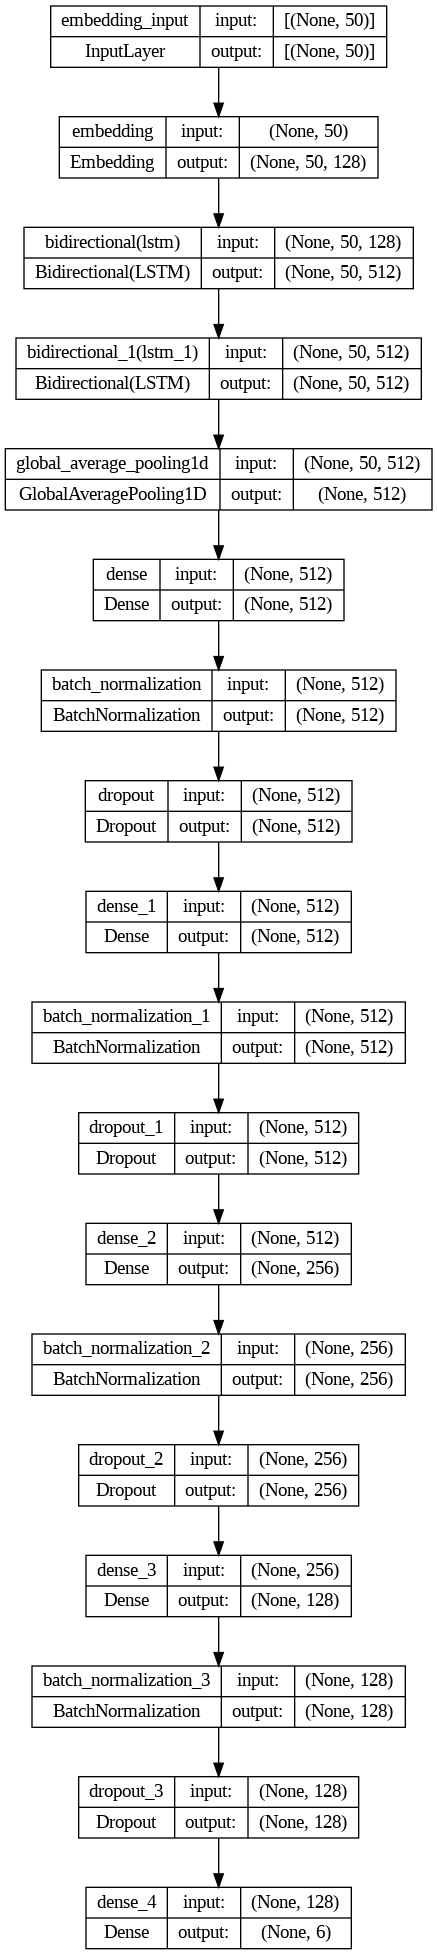

In [41]:
plot_model(model, to_file='rnn_model.png', show_shapes=True)

In [43]:
# Entrenar el modelo
his = model.fit(X, Y, epochs=10, batch_size=100)

Epoch 1/10
160/160 [==============================] - 30s 160ms/step - loss: 1.7926 - accuracy: 0.2677
Epoch 2/10
160/160 [==============================] - 13s 82ms/step - loss: 1.4347 - accuracy: 0.4571
Epoch 3/10
160/160 [==============================] - 9s 57ms/step - loss: 0.9087 - accuracy: 0.6606
Epoch 4/10
160/160 [==============================] - 8s 48ms/step - loss: 0.5489 - accuracy: 0.8071
Epoch 5/10
160/160 [==============================] - 8s 52ms/step - loss: 0.3546 - accuracy: 0.8794
Epoch 6/10
160/160 [==============================] - 8s 52ms/step - loss: 0.2294 - accuracy: 0.9253
Epoch 7/10
160/160 [==============================] - 7s 43ms/step - loss: 0.1438 - accuracy: 0.9546
Epoch 8/10
160/160 [==============================] - 7s 41ms/step - loss: 0.1091 - accuracy: 0.9644
Epoch 9/10
160/160 [==============================] - 6s 39ms/step - loss: 0.0843 - accuracy: 0.9726
Epoch 10/10
160/160 [==============================] - 6s 39ms/step - loss: 0.0759 - acc

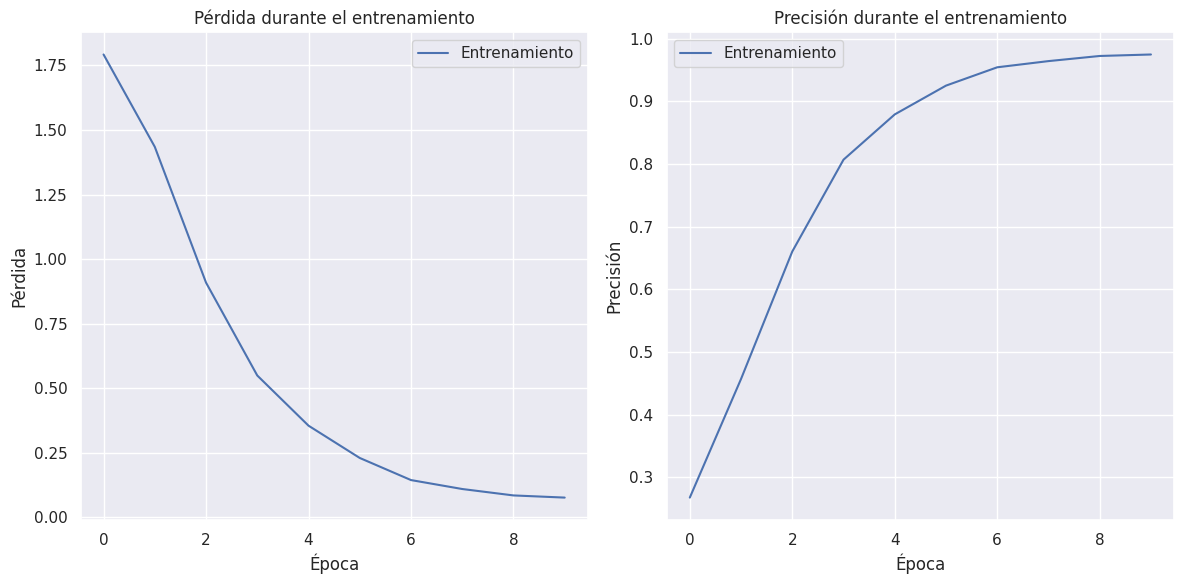

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el historial en un DataFrame de Seaborn
history_df = pd.DataFrame(his.history)

sns.set(style='darkgrid')
# Graficar la pérdida y la precisión del entrenamiento utilizando Seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss']])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento'])

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy']])
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento'])

plt.tight_layout()
plt.show()

**Evaluación del modelo**

 Una vez finalizado el entrenamiento, se evaluará el modelo utilizando el conjunto de prueba. Se calcularán métricas de evaluación, como precisión, recuerdo y puntuación F1, para medir el rendimiento del modelo en la clasificación de sentimientos.

63/63 [==============================] - 1s 9ms/step


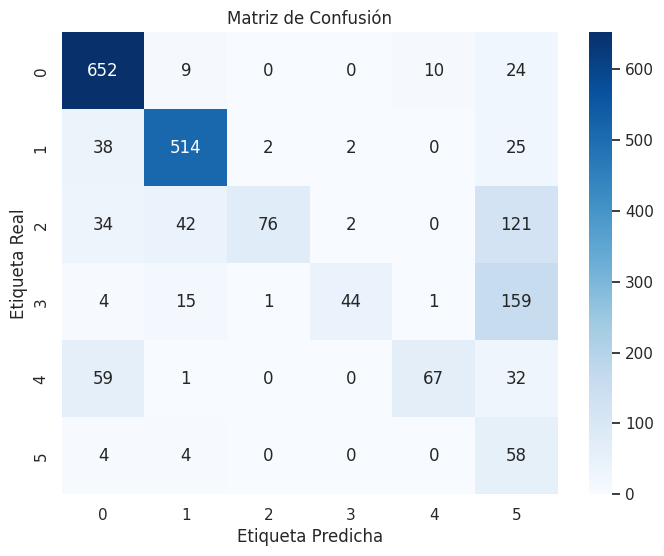

In [50]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(vec_val)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las probabilidades en etiquetas

# Obtener la matriz de confusión
cm = confusion_matrix(df_test["label"], y_pred)

# Configuración de estilo de Seaborn
sns.set()

# Graficar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')

plt.show()


In [59]:
inverse_code_sentiments = {0: 'joy', 1: 'sadness', 2: 'anger', 3: 'fear', 4: 'love', 5: 'surprise'}
inverse_code_sentiments[0]

'joy'

In [51]:
loss, accuracy = model.evaluate(vec_val, df_test["label"])
print("Loss:", loss)
print("Accuracy:", accuracy)

63/63 [==============================] - 1s 13ms/step - loss: 1.0318 - accuracy: 0.7055
Loss: 1.031806468963623
Accuracy: 0.7055000066757202


**Uso del modelo en nuevos datos** 

Una vez que el modelo esté entrenado y evaluado, se podrá utilizar para predecir los sentimientos en nuevos textos no etiquetados. Estos textos podrían ser comentarios de usuarios en redes sociales, reseñas de productos o cualquier otro tipo de texto en el que se desee realizar análisis de sentimientos.